In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py 
import pyFAI, pyFAI.detectors,pyFAI.azimuthalIntegrator

def visit_func(name, node):
    '''
    Return all groups and datasets name and shapes of h5 file called name
    '''
    if isinstance(node, h5py.Group):
        print(node.name)
    elif isinstance(node, h5py.Dataset):
        if (node.dtype == 'object') :
            print (node.name, 'is an object Dataset')
        else:
            print('\t', node.name, node.shape)
    else:
        print(node.name, 'is an unknown type')

In [38]:
# -- parameters
run = 1145497

# detector description
with h5py.File(str(run)+'.h5', 'r') as f:
    Pixel1=f[ '/run_'+str(run)+'/detector_2d_assembled_1/detector_info/pixel_size_in_micro_meter'][0]*10**-6
    Pixel2=f[ '/run_'+str(run)+'/detector_2d_assembled_1/detector_info/pixel_size_in_micro_meter'][1]*10**-6
    det=pyFAI.detectors.Detector(pixel1=Pixel1,pixel2=Pixel2,max_shape=[2399,2399]) 

    
#define an integrator
sample_det_distance=0.095
wavelength=0.887e-10
posx=Pixel1*1200
posy=Pixel2*1150
ai = pyFAI.azimuthalIntegrator.AzimuthalIntegrator(dist=sample_det_distance, detector=det, wavelength=wavelength,poni1=posx,poni2=posy)


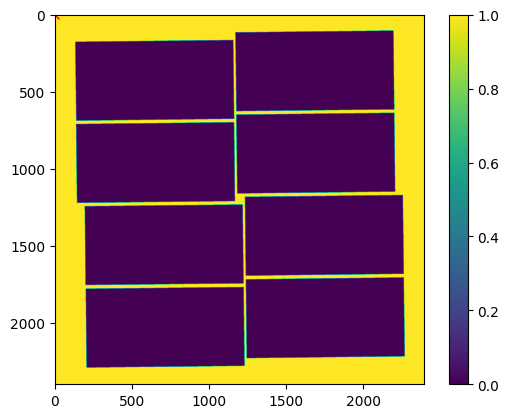

In [39]:
# mask
with h5py.File(str(run)+'.h5', 'r') as f:
    data=f['/run_1145497/detector_2d_assembled_1/tag_'+str(f['/run_1145497/event_info/tag_number_list'][0])+'/detector_data'][:]
mask=data[:,:]==0
plt.figure()
plt.imshow(mask,vmin=0,vmax=1)
plt.plot(posx,posy,'x',color='red')
plt.colorbar()

In [40]:
with h5py.File(str(run)+'.h5', 'r') as f:
    I=np.zeros([len(f['/run_1145497/event_info/tag_number_list']),300])
    i=0
    for tag in f['/run_1145497/event_info/tag_number_list'][:]:
        q,I[i,:]=np.array(ai.integrate1d(f['/run_'+str(run)+'/detector_2d_assembled_1/tag_'+str(tag)+'/detector_data'][:],
                                      300,mask=mask,correctSolidAngle=False,unit='q_nm^-1'))
        i=i+1
              


KeyError: 'Unable to open object (component not found)'

In [43]:
hf = h5py.File('data.h5', 'w')
hf.create_dataset('q', data=q)
hf.create_dataset('I', data=I)
hf.close()

In [44]:
data=h5py.File('data.h5', 'r')